## Liner Regression Model Tutorial

Youtube: https://www.youtube.com/watch?v=MRm5sBfdBBQ

Related git:
https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/simple-linear-regression/Linear%20Regression%20Model.ipynb

#### QUESTION: IS OIL PRICE A GOOD INDICATOR FOR SHARE PRICE OF EXXON?

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline


####Load data

In [21]:
df=pd.read_excel('oil_exxon.xlsx')
df.head()

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88


In [22]:
#set date to datetime object + makes date column th index + drop old date column
df.index = pd.to_datetime(df['date'])
df=df.drop(['date'],axis=1)

In [23]:
df.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


### Clean Data

In [24]:
 ###data types
df.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [25]:
#rename misspelling of exxon
new_column_names={'exon_price':'exxon_price'}
df=df.rename(columns=new_column_names)
df.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [26]:
#missing values nan
df.isna().any()

exxon_price    False
oil_price       True
dtype: bool

In [27]:
df=df.dropna() # drops row with missing value

In [28]:
df.isna().any() # no rows with missing values anymore

exxon_price    False
oil_price      False
dtype: bool

## Exploring Data

Text(3.9250000000000114, 0.5, 'PRICE OF OIL')

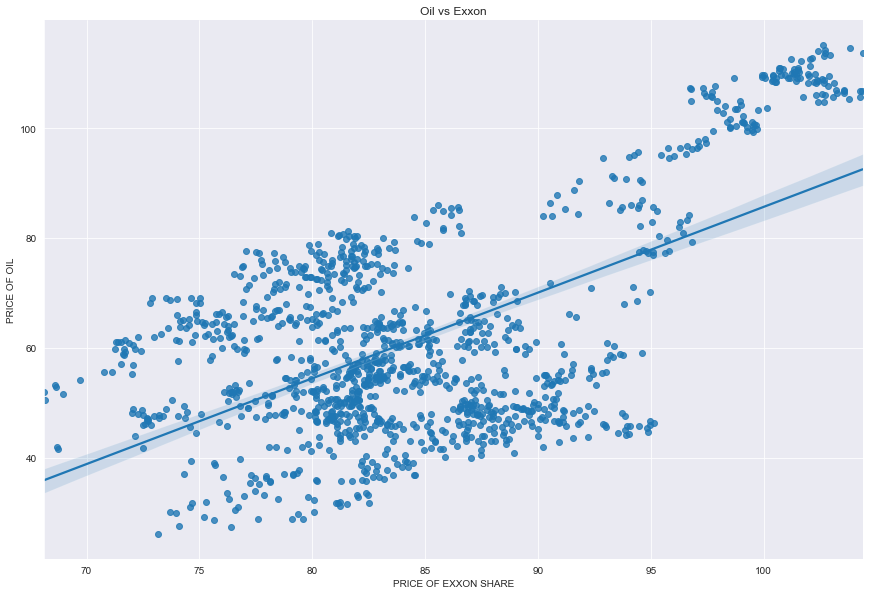

In [29]:

#fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("darkgrid")
sns.lmplot(data=df,x='exxon_price',y='oil_price',height=8,aspect=1.5,fit_reg=True)
plt.title("Oil vs Exxon")
plt.xlabel('PRICE OF EXXON SHARE')
plt.ylabel('PRICE OF OIL')

In [30]:
#measure correlation
print('Correlation: ',df.exxon_price.corr(df.oil_price))

Correlation:  0.6013198343393978


In [31]:
df.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


## checking ouliers and skewness


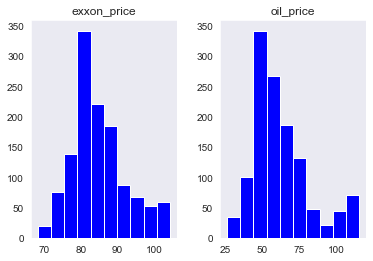

<Figure size 1332x756 with 0 Axes>

In [32]:

df.hist(grid = False, color='blue')
plt.figure(figsize=(18.5, 10.5))
plt.show()
#looks skewd

In [33]:
#calculate kurtosis and skew
exxon_kutrosis=kurtosis(df['exxon_price'],fisher=True)
oil_kutrosis=kurtosis(df['oil_price'],fisher=True)
exxon_skew=skew(df['exxon_price'])
oil_skew=skew(df['oil_price'])
print(f'exxon_kutrosis: {exxon_kutrosis},\noil_kutrosis: {oil_kutrosis},\nexxon_skew: {exxon_skew},\noil_skew: {oil_skew}')


exxon_kutrosis: 0.08838507514930338,
oil_kutrosis: 0.5321055130944878,
exxon_skew: 0.66024881165324,
oil_skew: 1.024326574686099


In [34]:
stats.kurtosistest(df['exxon_price'])

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

In [35]:
stats.kurtosistest(df['oil_price'])

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

In [36]:
#large datasets have skew and kurtosis

## BUILD THE MODEL

#### SPLIT THE DATA

In [37]:
#define input variable (X) and output variable (Y)
Y = df.drop('oil_price', axis = 1)
X = df[['oil_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

## Creat & Fit the model
Making the model surprises many people of how easy this step is. All we do is create an instance of the linear regression model from Sklearn and then call the fit() method to train the model on our training data.

In [38]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

In [39]:
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.23
The intercept for our model is 70.55
